In [2]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.preprocessing import StandardScaler
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("/content/content/MyDrive/customer_segmentation.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
educa_frecuencia = df['Marital_Status'].value_counts()
educa_frecuencia

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [8]:
# Reemplazar Low Fat a LF
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')

#Reemplazar Regular a RG
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO','Absurd','Alone', 'Divorced','Widow' ],'Single')


#Resultado final
frecuencia = df['Marital_Status'].value_counts()
frecuencia

,count
Marital_Status,
Married,1444
Single,796


In [9]:
# Convertir valores object a 1 y 0 - (1 = Low Fat & 0 = Regular)
df['Marital_Status'] = df['Marital_Status'].map({"Married":1,"Single":0})

In [10]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,0,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,0,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,1,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,1,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,1,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,1,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,1,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,0,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,1,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [12]:
hoy = pd.Timestamp(datetime.now())

# Calcular la cantidad de anos que tiene como socio
df['Dt_Customer'] = hoy.year - df['Dt_Customer'].dt.year
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,0,58138.0,0,0,12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,0,46344.0,1,1,10,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,1,71613.0,0,0,11,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,1,26646.0,1,0,10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,1,58293.0,1,0,10,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,1,61223.0,0,1,11,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,1,64014.0,2,1,10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,0,56981.0,0,0,10,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,1,69245.0,0,1,10,8,428,...,3,0,0,0,0,0,0,3,11,0


In [13]:
educa_frecuencia = df['Education'].value_counts()
df['Education'] = pd.Categorical(df['Education']).codes + 1
educa_frecuencia

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [14]:
df['Income'] = df['Income'].fillna(0)

In [15]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,3,0,58138.0,0,0,12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,3,0,46344.0,1,1,10,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,3,1,71613.0,0,0,11,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,3,1,26646.0,1,0,10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,5,1,58293.0,1,0,10,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,3,1,61223.0,0,1,11,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,5,1,64014.0,2,1,10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,3,0,56981.0,0,0,10,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,4,1,69245.0,0,1,10,8,428,...,3,0,0,0,0,0,0,3,11,0


In [16]:
y = df["Income"]
X = df.drop("Income", axis =1)

In [17]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Income
Non-Null Count  Dtype  
--------------  -----  
2240 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2240 non-null   int64
 1   Year_Birth           2240 non-null   int64
 2   Education            2240 non-null   int8 
 3   Marital_Status       2240 non-null   int64
 4   Kidhome              2240 non-null   int64
 5   Teenhome             2240 non-null   int64
 6   Dt_Customer          2240 non-null   int32
 7   Recency              2240 non-null   int64
 8   MntWines             2240 non-null   int64
 9   MntFruits            2240 non-null   int64
 10  MntMeatProducts      2240 non-null   int64
 11  MntFishProducts      2240 non-null   int64
 12  MntSweetProducts     2240 non-null   int64
 13  MntGoldProds         2240 non-null   int64
 14  NumDealsPurchases    2240 non-null   int64
 15  NumWebPurchases      2240 non-null   int64
 16  NumCatalogPurchases  224

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
# Crear el modelo de regresion lineal
customer_segmen_model = LinearRegression()

# Entrenar el modelo
customer_segmen_model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Hacer predicciones en el conjunto de prueba
y_pred = customer_segmen_model.predict(X_test)

# Calcular metricas de rendimiento
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Absoluto Medio (MAE):',mae)
print(f'Error Cuadrático Medio (MSE):',mse)
print(f'Coeficiente de Determinación (R^2):', r2)

Error Absoluto Medio (MAE): 7410.872142150603
Error Cuadrático Medio (MSE): 125426068.99437664
Coeficiente de Determinación (R^2): 0.7308126834371047


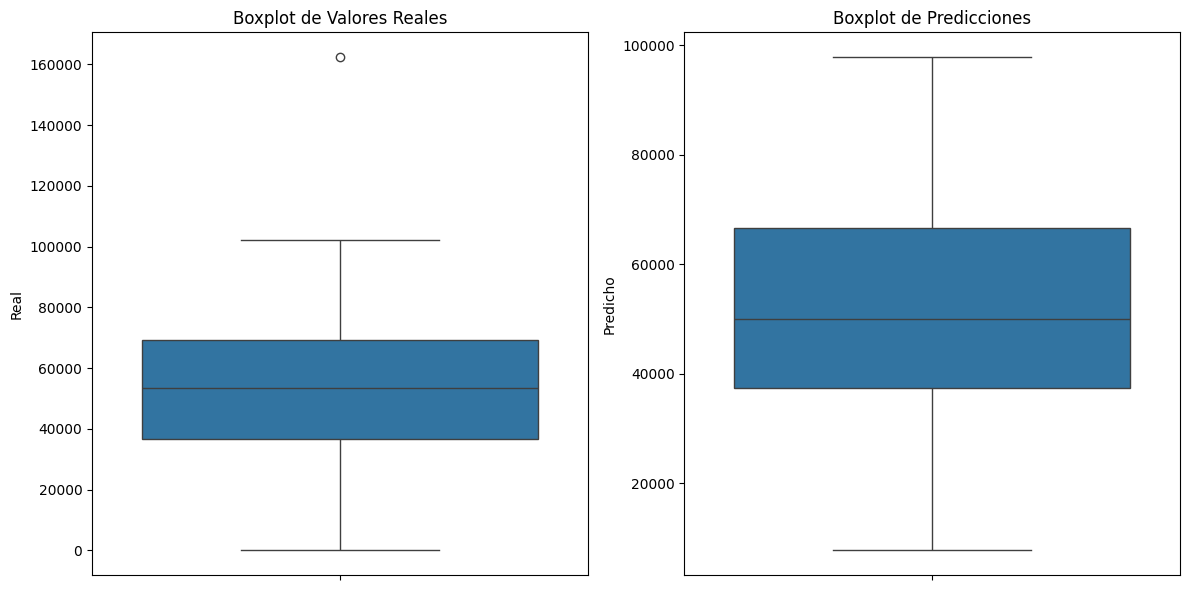

In [22]:
# Crear un DF para los valores reales y las predicciones
results_df = pd.DataFrame({
    'Real': y_test,
    'Predicho': y_pred
})


plt.figure(figsize=(12, 6))

# Boxplot para los valores reales
plt.subplot(1, 2, 1)
sns.boxplot(y=results_df['Real'])
plt.title('Boxplot de Valores Reales')

# Boxplot para las predicciones
plt.subplot(1, 2, 2)
sns.boxplot(y=results_df['Predicho'])
plt.title('Boxplot de Predicciones')

plt.tight_layout()
#plt.show()

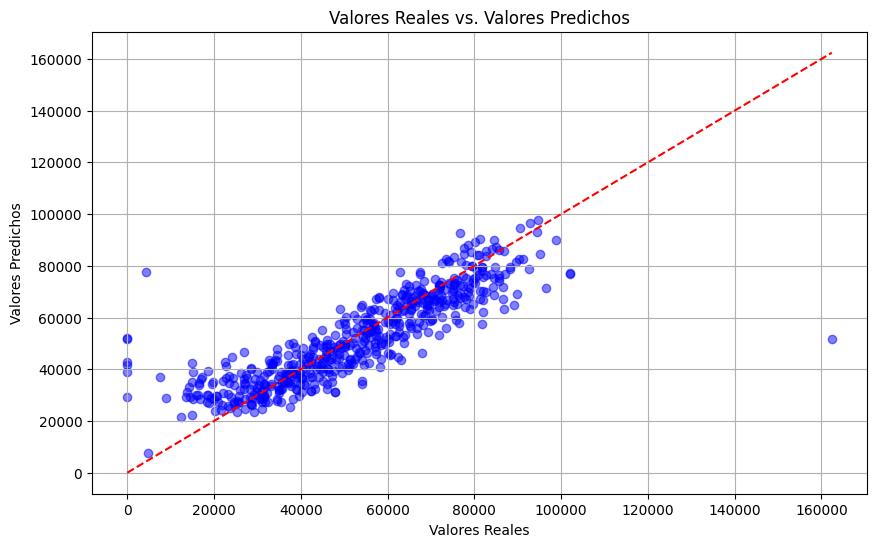

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.grid(True)
plt.show()

Varianza explicada por cada componente: [0.23141333 0.08129743]


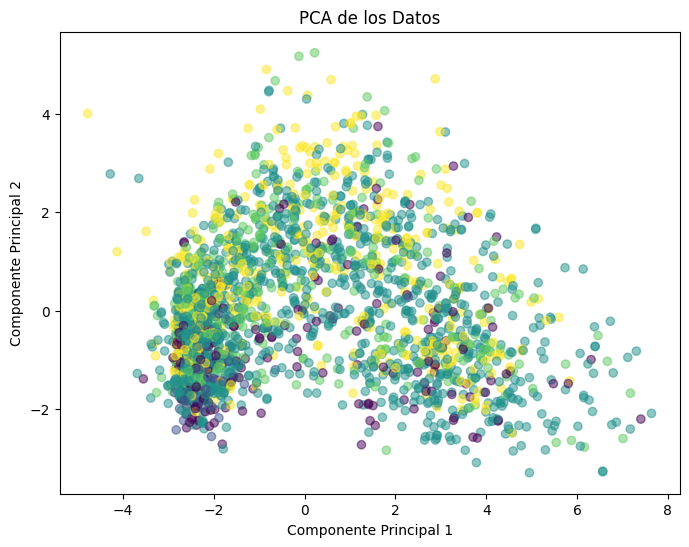

In [24]:
x = StandardScaler().fit_transform(X)

# Crear un objeto PCA con el número deseado de componentes
pca = PCA(n_components=2)  # Puedes ajustar el número de componentes

# Ajustar el modelo a los datos escalados
principalComponents = pca.fit_transform(x)

# Crear un nuevo DataFrame con los componentes principales
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

# Mostrar la varianza explicada por cada componente
print('Varianza explicada por cada componente:', pca.explained_variance_ratio_)

# Visualizar los datos en las dos primeras componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],c=df['Education'], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de los Datos')
plt.show()

In [34]:
df_pca = df[['Income', 'Education']]

# Escalar los datos
x = StandardScaler().fit_transform(df_pca)

In [35]:
pca = PCA(n_components=2)

# Ajustar el modelo a los datos escalados
principalComponents = pca.fit_transform(x)

# Crear un nuevo DataFrame con los componentes principales
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

# Mostrar la varianza explicada por cada componente
print('Varianza explicada por cada componente:', pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.55883035 0.44116965]


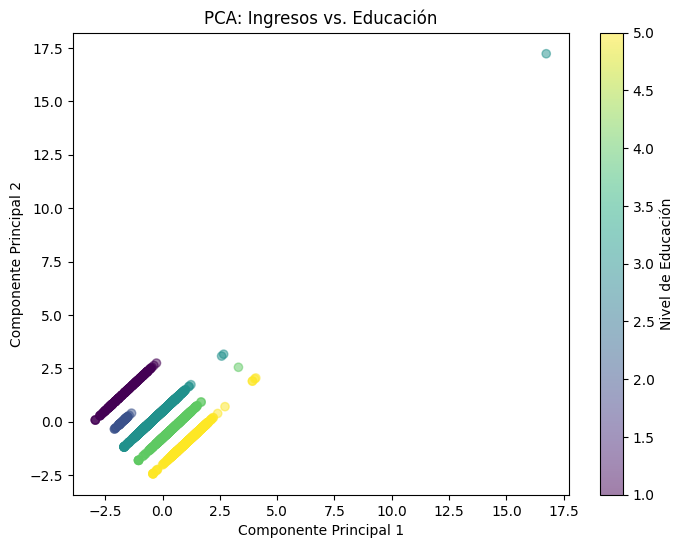

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=df['Education'], cmap='viridis', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA: Ingresos vs. Educación')
plt.colorbar(label='Nivel de Educación')
plt.show()

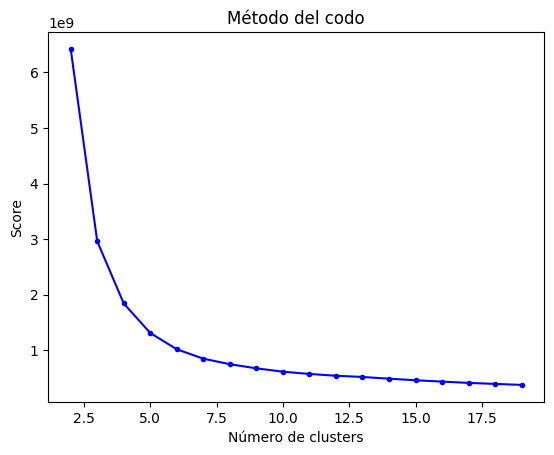

In [41]:
score = []
k_clusters = range(2,20) # Este range va de 2 a 20
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(kmeans.inertia_)

plt.plot(k_clusters, score,'b.-')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Método del codo')


plt.show()

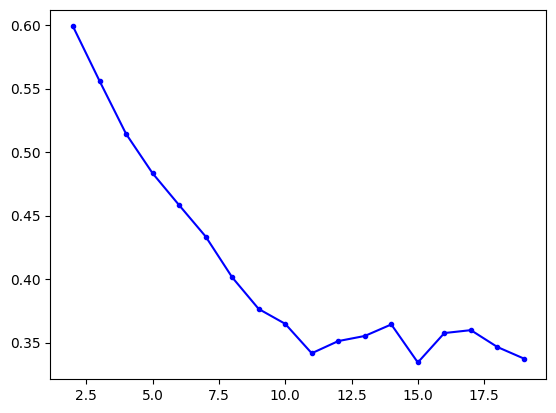

In [42]:

score = []
k_clusters = range(2,20) # Este range va de 2 a 20
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(silhouette_score(X, kmeans.labels_))
plt.plot(k_clusters, score,'b.-')